In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1.2 Import libraries
import pandas as pd
import glob
import os
import numpy as np

Mounted at /content/drive


In [ ]:
%pip install haversine

In [ ]:
from haversine import haversine

In [ ]:

# 1.3 Define paths
base_path = '/content/drive/MyDrive/Mobility Modeling/data'
helsinki_path = os.path.join(base_path, 'helsinki', 'database.csv')
nyc_folder  = os.path.join(base_path, 'nyc')


In [ ]:

# 1.4 Load Helsinki dataset
df_helsinki = pd.read_csv(helsinki_path)

<ipython-input-6-19cddb694a08>:2: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_helsinki = pd.read_csv(helsinki_path)


In [ ]:
df_helsinki.head()

departure               return departure_id    departure_name  \
0  2020-03-23 06:09:44  2020-03-23 06:16:26           86          Kuusitie   
1  2020-03-23 06:11:58  2020-03-23 06:26:31           26        Kamppi (M)   
2  2020-03-23 06:16:29  2020-03-23 06:24:23          268  Porolahden koulu   
3  2020-03-23 06:33:53  2020-03-23 07:14:03          751        Vallipolku   
4  2020-03-23 06:36:09  2020-03-23 07:04:10           62  Länsisatamankatu   

  return_id       return_name  distance (m)  duration (sec.)  \
0     111.0     Esterinportti        1747.0            401.0   
1      10.0       Kasarmitori        1447.0            869.0   
2     254.0       Agnetankuja        1772.0            469.0   
3     106.0   Korppaanmäentie        7456.0           2406.0   
4     121.0  Vilhonvuorenkatu        7120.0           1679.0   

   avg_speed (km/h)  departure_latitude  departure_longitude  return_latitude  \
0          0.261397           60.195245            24.901900        60.197572   
1          0.099908           60.168610            24.930537        60.165017   
2          0.226695           60.195540            25.053581        60.187234   
3          0.185935           60.227827            24.819614        60.203474   
4          0.254437           60.158928            24.909692        60.186463   

   return_longitude  Air temperature (degC)  
0         24.926781                     0.9  
1         24.949473                     0.9  
2         25.036412                     0.9  
3         24.898930                     0.9  
4         24.967872                     0.9

In [ ]:
# 1.5 Load & concatenate all NYC monthly files
nyc_files = glob.glob(os.path.join(nyc_folder, '2020*', '*tripdata*.csv'))
dfs = [pd.read_csv(f) for f in nyc_files]
df_nyc = pd.concat(dfs, ignore_index=True)
df_nyc.head()

<ipython-input-8-8cd842ce8d62>:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in nyc_files]
<ipython-input-8-8cd842ce8d62>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in nyc_files]
<ipython-input-8-8cd842ce8d62>:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in nyc_files]
<ipython-input-8-8cd842ce8d62>:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in nyc_files]
<ipython-input-8-8cd842ce8d62>:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in nyc_files]
<ipython-input-8-8cd842ce8d62>:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option o

ride_id rideable_type               started_at  \
0  19C6EDF5A2396D61  classic_bike  2020-04-22 20:54:06.711   
1  2550DE88E4F3410C  classic_bike  2020-04-08 10:52:20.635   
2  33F109E5D5859820  classic_bike  2020-04-01 12:15:15.450   
3  ED9238665EE31546  classic_bike  2020-04-12 16:11:28.706   
4  0A0F2B07945E969F  classic_bike  2020-04-22 17:43:19.280   

                  ended_at       start_station_name start_station_id  \
0  2020-04-22 21:27:35.004       Front St & Gold St          4927.04   
1  2020-04-08 11:22:02.079  Riverside Dr & W 104 St          7623.13   
2  2020-04-01 12:45:33.787  Riverside Dr & W 104 St          7623.13   
3  2020-04-12 16:35:47.159  Riverside Dr & W 104 St          7623.13   
4  2020-04-22 17:59:21.319      Broadway & Berry St          5164.04   

          end_station_name end_station_id  start_lat  start_lng    end_lat  \
0        Front St & Jay St        4895.03  40.702240 -73.982578  40.702461   
1          E 74 St & 1 Ave        6953.08  40.801343 -73.971146  40.768974   
2          E 74 St & 1 Ave        6953.08  40.801343 -73.971146  40.768974   
3          W 54 St & 9 Ave        6920.03  40.801343 -73.971146  40.765849   
4  Franklin St & Dupont St        5944.01  40.710446 -73.965251  40.735640   

     end_lng member_casual  
0 -73.986842        member  
1 -73.954823        member  
2 -73.954823        member  
3 -73.986905        casual  
4 -73.958660        member

In [ ]:
print(df_helsinki.info())
print(df_nyc.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12157458 entries, 0 to 12157457
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   departure               object 
 1   return                  object 
 2   departure_id            object 
 3   departure_name          object 
 4   return_id               object 
 5   return_name             object 
 6   distance (m)            float64
 7   duration (sec.)         float64
 8   avg_speed (km/h)        float64
 9   departure_latitude      float64
 10  departure_longitude     float64
 11  return_latitude         float64
 12  return_longitude        float64
 13  Air temperature (degC)  float64
dtypes: float64(8), object(6)
memory usage: 1.3+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5135812 entries, 0 to 5135811
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type      

In [ ]:
print(df_helsinki.isna().sum())
print(df_nyc.isna().sum())

departure                     0
return                        0
departure_id                  0
departure_name                0
return_id                     0
return_name                   0
distance (m)                  0
duration (sec.)               0
avg_speed (km/h)           3550
departure_latitude            0
departure_longitude           0
return_latitude               1
return_longitude              1
Air temperature (degC)    15902
dtype: int64
ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name       18
start_station_id         18
end_station_name      12995
end_station_id        12995
start_lat                 2
start_lng                 2
end_lat               12979
end_lng               12979
member_casual             0
dtype: int64


In [ ]:
display(df_helsinki.describe())
display(df_nyc.describe())

distance (m)  duration (sec.)  avg_speed (km/h)  departure_latitude  \
count  1.215746e+07     1.215746e+07      1.215391e+07        1.215746e+07   
mean   2.295275e+03     9.597751e+02      3.355556e-01        6.017981e+01   
std    2.452067e+04     7.346528e+03      3.428006e+01        1.733003e-02   
min   -4.292467e+06     0.000000e+00     -4.689001e+02        6.014792e+01   
25%    1.000000e+03     3.440000e+02      1.467403e-01        6.016723e+01   
50%    1.739000e+03     5.860000e+02      1.863679e-01        6.017608e+01   
75%    2.869000e+03     9.710000e+02      2.204348e-01        6.018964e+01   
max    3.681399e+06     5.401659e+06      1.699104e+04        6.023911e+01   

       departure_longitude  return_latitude  return_longitude  \
count         1.215746e+07     1.215746e+07      1.215746e+07   
mean          2.492023e+01     6.017971e+01      2.492023e+01   
std           5.764062e-02     1.738792e-02      5.783290e-02   
min           2.472137e+01     6.014792e+01      2.472137e+01   
25%           2.490969e+01     6.016689e+01      2.490969e+01   
50%           2.493407e+01     6.017559e+01      2.493407e+01   
75%           2.495029e+01     6.018964e+01      2.495029e+01   
max           2.510620e+01     6.023911e+01      2.510620e+01   

       Air temperature (degC)  
count            1.214156e+07  
mean             1.565044e+01  
std              5.497952e+00  
min             -5.200000e+00  
25%              1.230000e+01  
50%              1.640000e+01  
75%              1.930000e+01  
max              3.290000e+01

start_lat     start_lng       end_lat       end_lng
count  5.135810e+06  5.135810e+06  5.122833e+06  5.122833e+06
mean   4.073952e+01 -7.397677e+01  4.073916e+01 -7.397692e+01
std    3.477726e-02  2.292729e-02  3.909530e-02  3.993725e-02
min    4.065540e+01 -7.401713e+01  0.000000e+00 -7.407126e+01
25%    4.071535e+01 -7.399384e+01  4.071534e+01 -7.399393e+01
50%    4.073932e+01 -7.398068e+01  4.073902e+01 -7.398093e+01
75%    4.076395e+01 -7.396057e+01  4.076371e+01 -7.396057e+01
max    4.084284e+01 -7.389795e+01  4.086175e+01  0.000000e+00

In [ ]:
# Define common window
start_date = '2020-04-08'
end_date   = '2020-06-30'

# Filter NYC
df_nyc = df_nyc[
    (df_nyc['started_at'] >= start_date) &
    (df_nyc['started_at'] <= end_date)
]

# Filter Helsinki
df_helsinki = df_helsinki[
    (df_helsinki['departure'] >= start_date) &
    (df_helsinki['departure'] <= end_date)
]

# Quick check
print("NYC window:", df_nyc['started_at'].min(), df_nyc['started_at'].max())
print("Helsinki window:", df_helsinki['departure'].min(), df_helsinki['departure'].max())


NYC window: 2020-04-08 00:00:10.316 2020-06-29 23:59:53.684
Helsinki window: 2020-04-08 00:01:03 2020-06-29 23:59:58


## DATA CLEANING

1. Helsinki Dataset Cleaning

In [ ]:
# Parse timestamps

df_helsinki['departure'] = pd.to_datetime(df_helsinki['departure'], errors='coerce')
df_helsinki['return']    = pd.to_datetime(df_helsinki['return'],    errors='coerce')

In [ ]:
dist_km = df_helsinki['distance (m)'] / 1000
time_hr = df_helsinki['duration (sec.)'] / 3600
df_helsinki['speed_kmh'] = dist_km / time_hr

df_helsinki = df_helsinki[
    (df_helsinki['distance (m)'] > 0) &
    (df_helsinki['duration (sec.)'] > 0)
]

In [ ]:
# Drop rows with missing coordinates or timestamps

df_helsinki = df_helsinki.dropna(subset=[
    'departure','return',
    'departure_latitude','departure_longitude',
    'return_latitude','return_longitude'
])

In [ ]:
# Remove impossible trips

# Negative or zero distance
df_helsinki = df_helsinki[df_helsinki['distance (m)'] > 0]
# Zero or negative duration
df_helsinki = df_helsinki[df_helsinki['duration (sec.)'] > 0]

In [ ]:
# Filter out extreme outliers

# drop trips longer than 5 hours (18 000 sec) or distances > 50 km
df_helsinki = df_helsinki[
    (df_helsinki['duration (sec.)'] < 18_000) &
    (df_helsinki['distance (m)']     < 50_000)
]

2. NYC Dataset Cleaning

In [ ]:
# Coerce timestamps to datetime
df_nyc['started_at'] = pd.to_datetime(df_nyc['started_at'], errors='coerce')
df_nyc['ended_at']   = pd.to_datetime(df_nyc['ended_at'],   errors='coerce')

In [ ]:
# Drop rows missing critical values

df_nyc = df_nyc.dropna(subset=[
    'started_at','ended_at',
    'start_lat','start_lng','end_lat','end_lng'
])

In [ ]:
# Remove zero or negative durations

df_nyc = df_nyc[df_nyc['ended_at'] > df_nyc['started_at']]

In [ ]:
def compute_dist(row):
    return haversine(
        (row.start_lat, row.start_lng),
        (row.end_lat,   row.end_lng)
    )

In [ ]:
# Duration (sec)
df_nyc['duration_s'] = (df_nyc['ended_at'] - df_nyc['started_at']).dt.total_seconds()
# Distance (km)
df_nyc['distance_km'] = df_nyc.apply(compute_dist, axis=1)

# Speed (km/h)
df_nyc['speed_kmh']   = df_nyc['distance_km'] / (df_nyc['duration_s'] / 3600)

# Filter extremes: duration < 5 hours, distance < 50 km
df_nyc = df_nyc[
    (df_nyc['duration_s'] < 18_000) &
    (df_nyc['distance_km']  < 50)
]

df_nyc = df_nyc[(df_nyc['distance_km'] > 0) & (df_nyc['speed_kmh'] > 0)]

In [ ]:
df_nyc.head()

ride_id  rideable_type              started_at  \
0  19C6EDF5A2396D61   classic_bike 2020-04-22 20:54:06.711   
1  2550DE88E4F3410C   classic_bike 2020-04-08 10:52:20.635   
3  ED9238665EE31546   classic_bike 2020-04-12 16:11:28.706   
4  0A0F2B07945E969F   classic_bike 2020-04-22 17:43:19.280   
5  9A3A386568B4B24E  electric_bike 2020-04-14 19:50:52.060   

                 ended_at       start_station_name start_station_id  \
0 2020-04-22 21:27:35.004       Front St & Gold St          4927.04   
1 2020-04-08 11:22:02.079  Riverside Dr & W 104 St          7623.13   
3 2020-04-12 16:35:47.159  Riverside Dr & W 104 St          7623.13   
4 2020-04-22 17:59:21.319      Broadway & Berry St          5164.04   
5 2020-04-14 20:18:59.214          E 45 St & 3 Ave          6464.08   

          end_station_name end_station_id  start_lat  start_lng    end_lat  \
0        Front St & Jay St        4895.03  40.702240 -73.982578  40.702461   
1          E 74 St & 1 Ave        6953.08  40.801343 -73.971146  40.768974   
3          W 54 St & 9 Ave        6920.03  40.801343 -73.971146  40.765849   
4  Franklin St & Dupont St        5944.01  40.710446 -73.965251  40.735640   
5      Mott St & Prince St        5561.04  40.752554 -73.972826  40.723180   

     end_lng member_casual  duration_s  distance_km  speed_kmh  
0 -73.986842        member    2008.293     0.360285   0.645835  
1 -73.954823        member    1781.444     3.852716   7.785694  
3 -73.986905        casual    1458.453     4.163817  10.277836  
4 -73.958660        member     962.039     2.855980  10.687227  
5 -73.994800        member    1687.154     3.754455   8.011146

In [ ]:

df_helsinki.head()

departure              return departure_id  departure_name  \
91558 2020-04-08 00:01:03 2020-04-08 00:14:46           87     Kustaankatu   
91559 2020-04-08 00:02:42 2020-04-08 00:16:35           36     Apollonkatu   
91560 2020-04-08 00:02:57 2020-04-08 00:15:38           75        Korjaamo   
91561 2020-04-08 00:03:09 2020-04-08 00:21:21           36     Apollonkatu   
91562 2020-04-08 00:03:28 2020-04-08 00:32:06          133  Paavalinpuisto   

      return_id         return_name  distance (m)  duration (sec.)  \
91558      87.0         Kustaankatu        1527.0            819.0   
91559      29.0               Baana        2555.0            831.0   
91560      63.0  Jätkäsaarenlaituri        2476.0            755.0   
91561       3.0  Kapteeninpuistikko        2948.0           1087.0   
91562     117.0    Brahen puistikko        1178.0           1715.0   

       avg_speed (km/h)  departure_latitude  departure_longitude  \
91558          0.111868           60.188275            24.955976   
91559          0.184477           60.176080            24.922394   
91560          0.196768           60.183868            24.919837   
91561          0.162723           60.176080            24.922394   
91562          0.041213           60.197489            24.961438   

       return_latitude  return_longitude  Air temperature (degC)  speed_kmh  
91558        60.188275         24.955976                     6.2   6.712088  
91559        60.164088         24.922566                     6.2  11.068592  
91560        60.161931         24.921490                     6.2  11.806093  
91561        60.158189         24.944927                     6.2   9.763385  
91562        60.189671         24.948102                     6.2   2.472770

## SHIVAM

1. Add Temporal Features
We need “hour of day” and “weekday” so we can explore when people ride.

In [ ]:
# NYC
df_nyc['hour']    = df_nyc['started_at'].dt.hour
df_nyc['weekday'] = df_nyc['started_at'].dt.day_name()

# Helsinki
df_helsinki['hour']    = df_helsinki['departure'].dt.hour
df_helsinki['weekday'] = df_helsinki['departure'].dt.day_name()

2. Compare Distributions of Trip Metrics
This addresses:

Trip Durations (Q1)

Distances & Speeds (Q2)

Overall System Efficiency (Q5)

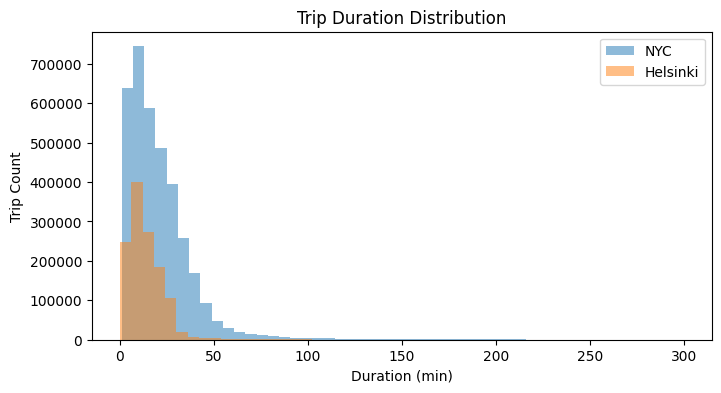

In [ ]:
import matplotlib.pyplot as plt

# Duration (minutes)
plt.figure(figsize=(8,4))
plt.hist(df_nyc['duration_s']/60, bins=50, alpha=0.5, label='NYC')
plt.hist(df_helsinki['duration (sec.)']/60, bins=50, alpha=0.5, label='Helsinki')
plt.xlabel('Duration (min)')
plt.ylabel('Trip Count')
plt.title('Trip Duration Distribution')
plt.legend()
plt.show()

# How does bike-sharing usage differ by time-of-day and day-of-week in NYC versus Helsinki? (done)


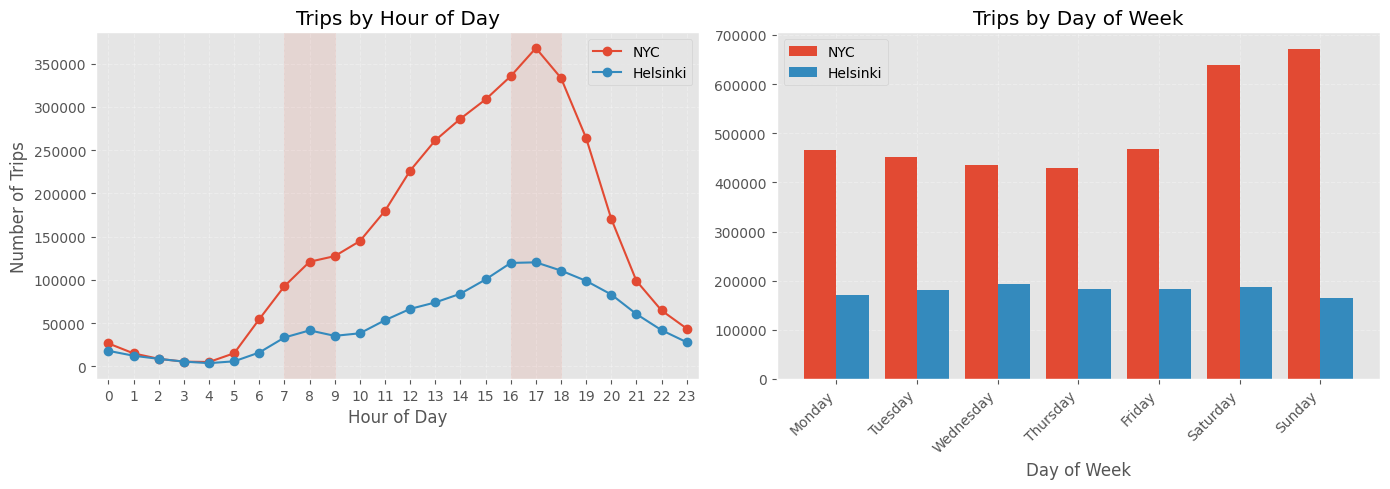

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -- prepare the counts --
hour_order = list(range(24))
weekdays   = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

nyc_by_hour  = df_nyc.groupby('hour').size().reindex(hour_order, fill_value=0)
hel_by_hour  = df_helsinki.groupby('hour').size().reindex(hour_order, fill_value=0)

nyc_by_wday  = df_nyc.groupby('weekday').size().reindex(weekdays, fill_value=0)
hel_by_wday  = df_helsinki.groupby('weekday').size().reindex(weekdays, fill_value=0)

# -- set a built‐in style and create subplots --
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# —— Panel 1: Hourly Pattern ——
ax = axes[0]
ax.plot(hour_order, nyc_by_hour,  marker='o', label='NYC',      color='C0')
ax.plot(hour_order, hel_by_hour,  marker='o', label='Helsinki', color='C1')
ax.axvspan(7, 9,   color='C0', alpha=0.1)   # highlight morning rush
ax.axvspan(16,18,  color='C0', alpha=0.1)   # highlight evening rush
ax.set_xticks(hour_order)
ax.set_xlim(-0.5, 23.5)
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Trips")
ax.set_title("Trips by Hour of Day")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)

# —— Panel 2: Daily Pattern ——
ax = axes[1]
x = np.arange(len(weekdays))
w = 0.4
ax.bar(x - w/2, nyc_by_wday, width=w, label='NYC',      color='C0')
ax.bar(x + w/2, hel_by_wday, width=w, label='Helsinki', color='C1')
ax.set_xticks(x)
ax.set_xticklabels(weekdays, rotation=45, ha='right')
ax.set_xlabel("Day of Week")
ax.set_title("Trips by Day of Week")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


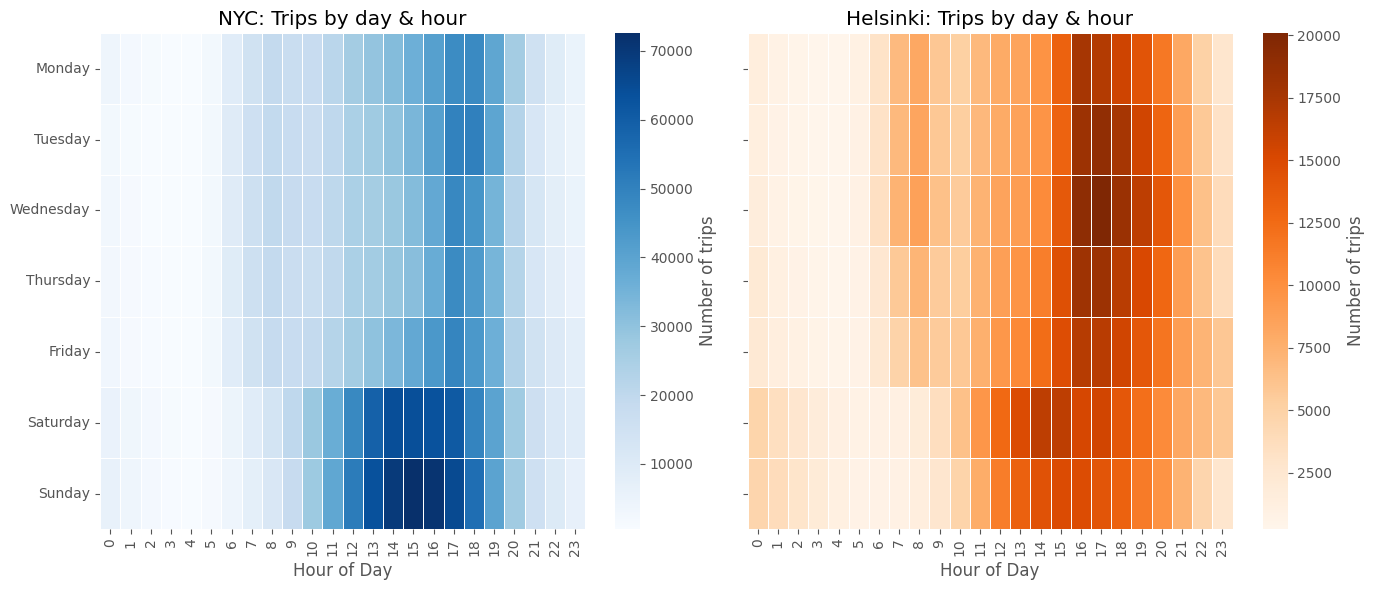

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# make sure your weekdays list is in the right order
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# 1) build a little “long” table with counts per weekday+hour
nyc_cts = (
    df_nyc
    .groupby(['weekday','hour'])
    .size()
    .reset_index(name='cnt')
)
hel_cts = (
    df_helsinki
    .groupby(['weekday','hour'])
    .size()
    .reset_index(name='cnt')
)

# 2) pivot with keywords
nyc_piv = nyc_cts.pivot(
    index='weekday',
    columns='hour',
    values='cnt',
).reindex(weekdays)       # reorder rows
hel_piv = hel_cts.pivot(
    index='weekday',
    columns='hour',
    values='cnt',
).reindex(weekdays)

# 3) plot two heatmaps side by side
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6), sharey=True)

sns.heatmap(
    nyc_piv,
    ax=ax1,
    cmap="Blues",
    cbar_kws={'label':'Number of trips'},
    linewidths=.5,
)
ax1.set_title("NYC: Trips by day & hour")
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("")    # already implied by the tick labels

sns.heatmap(
    hel_piv,
    ax=ax2,
    cmap="Oranges",
    cbar_kws={'label':'Number of trips'},
    linewidths=.5,
)
ax2.set_title("Helsinki: Trips by day & hour")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("")

plt.tight_layout()
plt.show()


What you see:

On weekdays, NYC’s morning and evening commute spikes are very sharp (bright blue bands at 8 AM and 6 PM), whereas Helsinki’s morning increase is broader and less intense, and its evening peak shifts later (5–7 PM).

On Saturdays and Sundays, both cities shift to a single “leisure” hump around mid- to late afternoon, but NYC’s absolute trip counts stay roughly 3–4× higher than Helsinki’s.

Helsinki’s pattern is smoothed out across the day (lighter orange bands stretching from mid-morning to early evening), implying more flexible use rather than a rigid commuter pattern.

What it means:

Commuter vs. Leisure: NYC’s service is heavily embedded in daily commuting—hence two daily spikes. Helsinki shows weaker commuter reliance (weekday morning is broad) and stronger all-day usage.

Service design: Helsinki could optimize its fleet/capacity by shifting more bikes into service later in the morning and sustaining them into the evening plateau. NYC needs to manage very rapid turnover at rush hours.

Cultural differences: New Yorkers are more “all-in” on bike-sharing for both commutes and off-peak leisure, whereas Helsinki riders are perhaps using the system more evenly and less for strict 9–5 commuting.

4. Map Station Usage
Answers:

Busiest Stations & Spatial Influence (Q4)

In [ ]:
%pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 33.9 MB/s eta 0:00:00


# Which stations exhibit the highest usage in each city, and how do their spatial distributions to urban features influence this usage? (done)

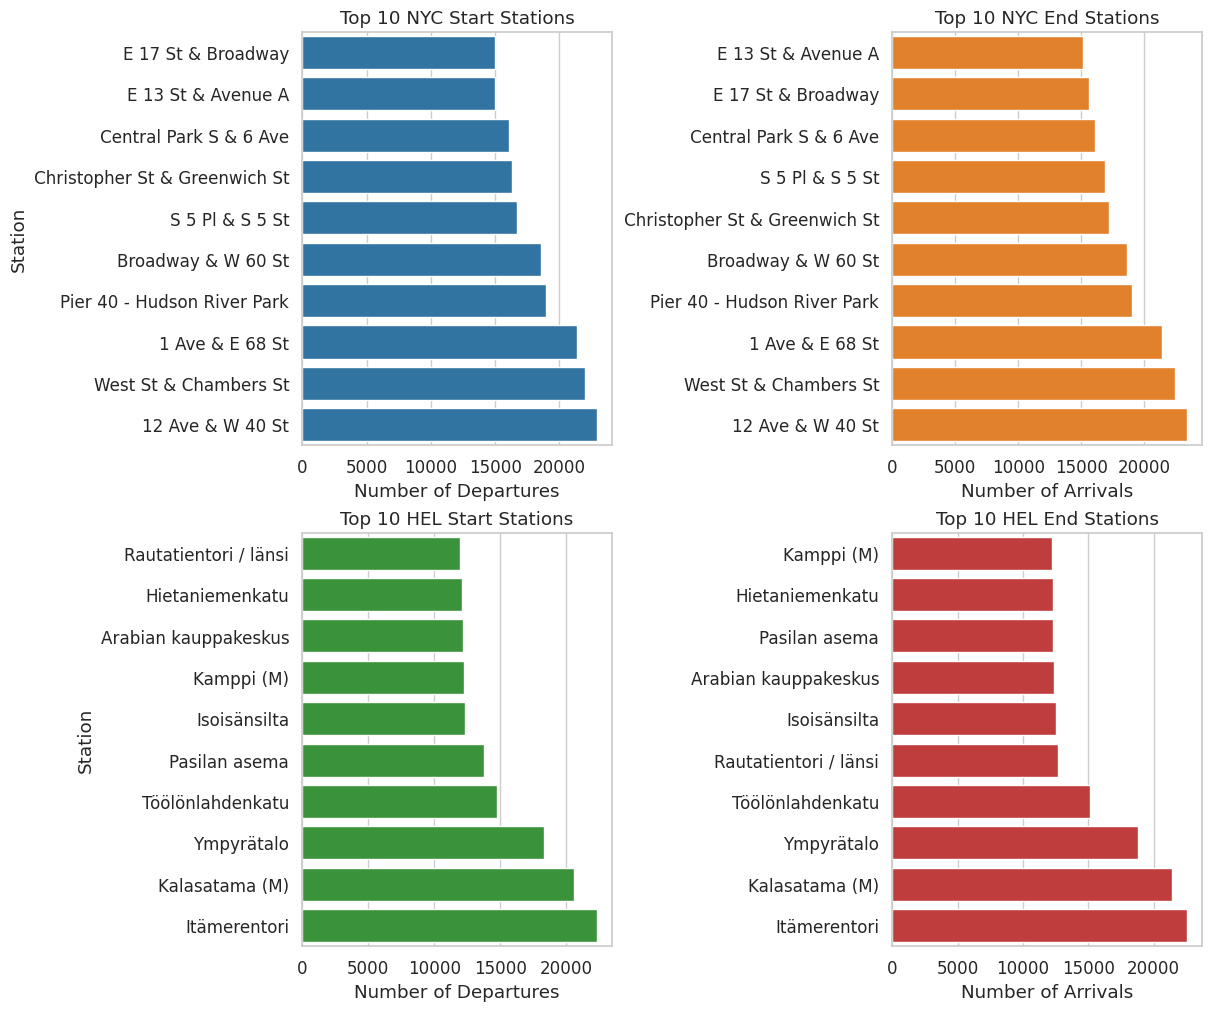

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# NYC
nyc_top_start = df_nyc['start_station_name'].value_counts().head(10)
nyc_top_end   = df_nyc['end_station_name'].value_counts().head(10)

# Helsinki
hel_top_start = df_helsinki['departure_name'].value_counts().head(10)
hel_top_end   = df_helsinki['return_name'].value_counts().head(10)

sns.set(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("tab10", 4)

fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

# NYC
sns.barplot(x=nyc_top_start.values[::-1],
            y=nyc_top_start.index[::-1],
            ax=axes[0,0],
            color=palette[0])
axes[0,0].set_title("Top 10 NYC Start Stations")
axes[0,0].set_xlabel("Number of Departures")
axes[0,0].set_ylabel("Station")

sns.barplot(x=nyc_top_end.values[::-1],
            y=nyc_top_end.index[::-1],
            ax=axes[0,1],
            color=palette[1])
axes[0,1].set_title("Top 10 NYC End Stations")
axes[0,1].set_xlabel("Number of Arrivals")
axes[0,1].set_ylabel("")

# Helsinki
sns.barplot(x=hel_top_start.values[::-1],
            y=hel_top_start.index[::-1],
            ax=axes[1,0],
            color=palette[2])
axes[1,0].set_title("Top 10 HEL Start Stations")
axes[1,0].set_xlabel("Number of Departures")
axes[1,0].set_ylabel("Station")

sns.barplot(x=hel_top_end.values[::-1],
            y=hel_top_end.index[::-1],
            ax=axes[1,1],
            color=palette[3])
axes[1,1].set_title("Top 10 HEL End Stations")
axes[1,1].set_xlabel("Number of Arrivals")
axes[1,1].set_ylabel("")

plt.show()


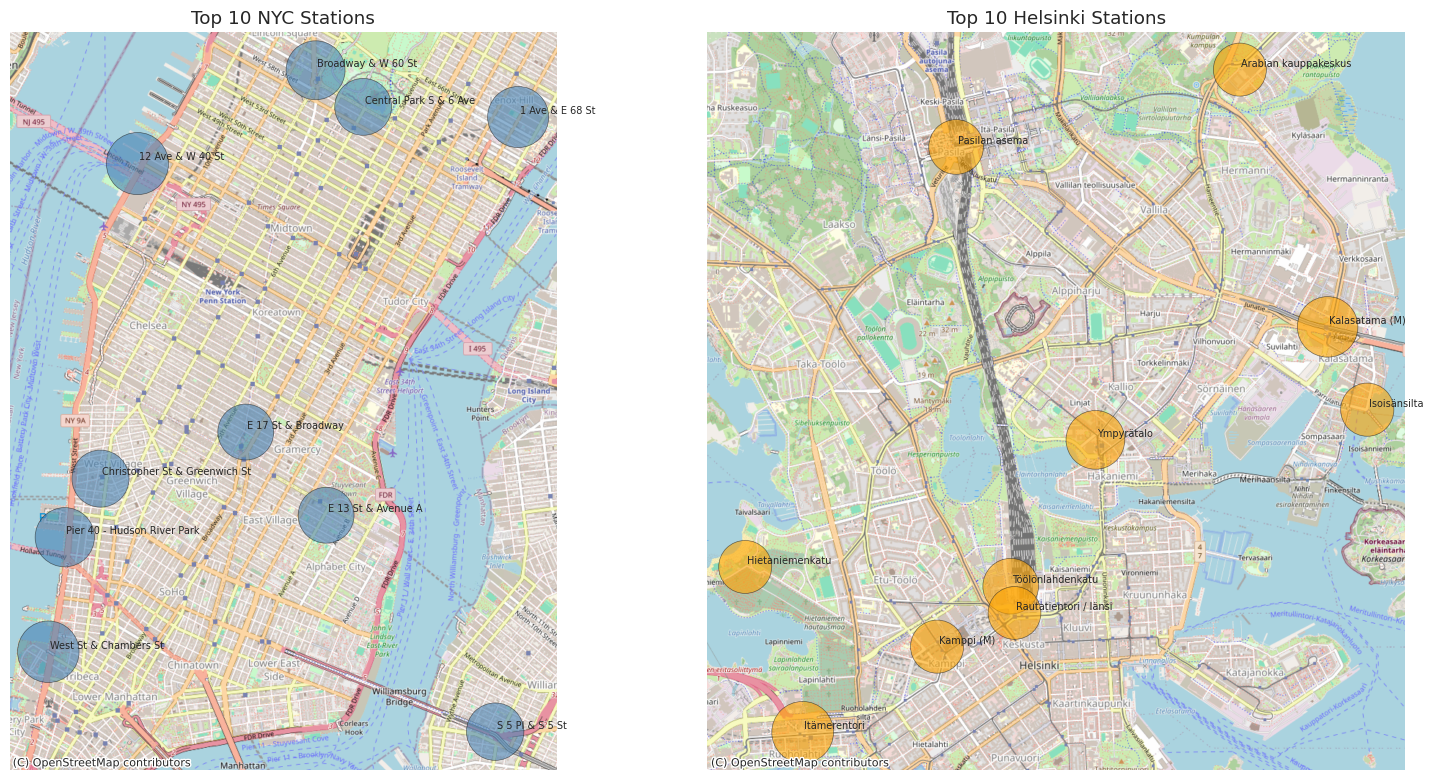

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
from matplotlib.lines import Line2D

# —————————————————————————————
# 1) Compute top-10 station counts + coords
# —————————————————————————————

# NYC
top_nyc = df_nyc['start_station_name'].value_counts().head(10)
coords_nyc = (
    df_nyc
    .drop_duplicates('start_station_name')
    .set_index('start_station_name')
    .loc[top_nyc.index, ['start_lng','start_lat']]
)
counts_nyc = top_nyc.values

# Helsinki
top_hel = df_helsinki['departure_name'].value_counts().head(10)
coords_hel = (
    df_helsinki
    .drop_duplicates('departure_name')
    .set_index('departure_name')
    .loc[top_hel.index, ['departure_longitude','departure_latitude']]
)
counts_hel = top_hel.values

# ————————————————————————
# 2) Compute a unified marker scale
# ————————————————————————
all_counts = np.concatenate([counts_nyc, counts_hel])
global_max = all_counts.max()

max_marker_size = 2000
sizes_nyc = np.sqrt(counts_nyc)/np.sqrt(global_max)*max_marker_size
sizes_hel = np.sqrt(counts_hel)/np.sqrt(global_max)*max_marker_size

# ——————————————————————
# 3) Build GeoDataFrames
# ——————————————————————
gdf_nyc = gpd.GeoDataFrame(
    {'count': counts_nyc},
    geometry=[Point(xy) for xy in coords_nyc.values],
    index=coords_nyc.index,
    crs='EPSG:4326'
).to_crs(epsg=3857)

gdf_hel = gpd.GeoDataFrame(
    {'count': counts_hel},
    geometry=[Point(xy) for xy in coords_hel.values],
    index=coords_hel.index,
    crs='EPSG:4326'
).to_crs(epsg=3857)

# ————————————————————————————————————
# 4) Prepare a little proportional‐symbol legend
# ————————————————————————————————————
# pick three representative counts (min, median, max)
ex_counts = [int(all_counts.min()), int(np.median(all_counts)), int(all_counts.max())]
ex_sizes  = np.sqrt(ex_counts)/np.sqrt(global_max)*max_marker_size

legend_nyc = [
    Line2D([0],[0],
           marker='o', color='none',
           markerfacecolor='steelblue',
           markeredgecolor='k', alpha=0.6,
           markersize=np.sqrt(sz),
           label=f"{cnt:,} trips")
    for cnt, sz in zip(ex_counts, ex_sizes)
]
legend_hel = [
    Line2D([0],[0],
           marker='o', color='none',
           markerfacecolor='orange',
           markeredgecolor='k', alpha=0.6,
           markersize=np.sqrt(sz),
           label=f"{cnt:,} trips")
    for cnt, sz in zip(ex_counts, ex_sizes)
]

# ——————————————————————
# 5) Plot side-by-side maps
# ——————————————————————
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

# NYC
gdf_nyc.plot(
    ax=ax1,
    markersize=sizes_nyc,
    color='steelblue',
    edgecolor='k',
    linewidth=0.5,
    alpha=0.6
)
# offset labels
for name, row in gdf_nyc.iterrows():
    ax1.text(row.geometry.x + 20, row.geometry.y + 20,
             name, fontsize=7, ha='left', va='bottom')
# basemap & zoom
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)
minx, miny, maxx, maxy = gdf_nyc.total_bounds
ax1.set_xlim(minx - 500, maxx + 500)
ax1.set_ylim(miny - 500, maxy + 500)
ax1.set_title("Top 10 NYC Stations")
ax1.axis('off')
# ax1.legend(handles=legend_nyc, title="Trip counts", loc="lower left", fontsize='small')

# Helsinki
gdf_hel.plot(
    ax=ax2,
    markersize=sizes_hel,
    color='orange',
    edgecolor='k',
    linewidth=0.5,
    alpha=0.6
)
for name, row in gdf_hel.iterrows():
    ax2.text(row.geometry.x + 20, row.geometry.y + 20,
             name, fontsize=7, ha='left', va='bottom')
ctx.add_basemap(ax2, source=ctx.providers.OpenStreetMap.Mapnik)
minx, miny, maxx, maxy = gdf_hel.total_bounds
ax2.set_xlim(minx - 500, maxx + 500)
ax2.set_ylim(miny - 500, maxy + 500)
ax2.set_title("Top 10 Helsinki Stations")
ax2.axis('off')
# ax2.legend(handles=legend_hel, title="Trip counts", loc="lower left", fontsize='small')

plt.tight_layout()
plt.show()


Key observations from the maps above:

New York City

The top ten departure stations cluster in two main corridors:

Midtown Manhattan along the west side (e.g. 12 Ave & W 40 St, Broadway & W 60 St, Central Park S & 6 Ave).

Lower Manhattan near large employment/entertainment nodes (e.g. Christopher St & Greenwich St, West St & Chambers St, Pier 40 on Hudson River Park).

These spots coincide with:

High commuter traffic (close to major subway stations and office towers).

Recreational destinations (Hudson River Greenway, Central Park).

Strong multimodal connectivity (ferries, PATH, multiple subway lines).

Implication: Riders are using Citi Bike both for first/last mile on their work commute and for leisure trips along the waterfront and into the park.

Helsinki

The ten busiest stations are tightly concentrated in the central city:

Major transit hubs (Rautatientori / Asema-aukio, Pasila station).

High-density mixed-use areas (Kamppi, Kluuvi, Isoisänsilta).

Redevelopment corridors (Kalastama, Arabianranta).

Unlike NYC, there is almost no sprawl of high-usage stations—everything is within a 2 km radius of the main rail/subway spine.

<ipython-input-32-d0357dbd609d>:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot([nyc_dur, hel_dur], labels=['NYC','Helsinki'])
<ipython-input-32-d0357dbd609d>:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,1].boxplot([nyc_dist, hel_dist], labels=['NYC','Helsinki'])


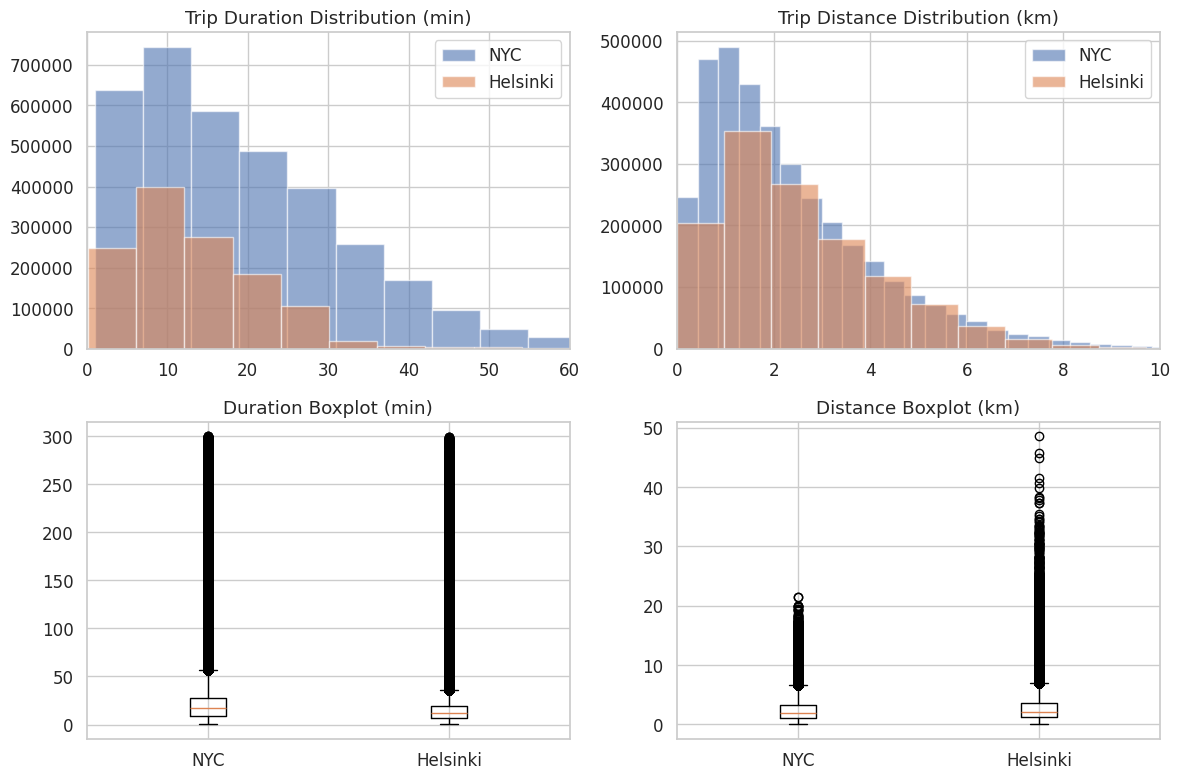

NYC dur mean    21.316292
50%     16.854717
std     20.450097
Name: duration_s, dtype: float64
HEL dur mean    14.396496
50%     11.816667
std     13.698800
Name: duration (sec.), dtype: float64
NYC dist mean    2.361834
50%     1.873391
std     1.829227
Name: distance_km, dtype: float64
HEL dist mean    2.599229
50%     2.172000
std     1.857874
Name: distance (m), dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Convert to minutes/kilometres
nyc_dur = df_nyc['duration_s'] / 60
hel_dur = df_helsinki['duration (sec.)'] / 60

nyc_dist = df_nyc['distance_km']
hel_dist = df_helsinki['distance (m)'] / 1000

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Duration histograms
axes[0,0].hist(nyc_dur, bins=50, alpha=0.6, label='NYC')
axes[0,0].hist(hel_dur, bins=50, alpha=0.6, label='Helsinki')
axes[0,0].set_xlim(0, 60)
axes[0,0].set_title('Trip Duration Distribution (min)')
axes[0,0].legend()

# Distance histograms
axes[0,1].hist(nyc_dist, bins=50, alpha=0.6, label='NYC')
axes[0,1].hist(hel_dist, bins=50, alpha=0.6, label='Helsinki')
axes[0,1].set_xlim(0, 10)
axes[0,1].set_title('Trip Distance Distribution (km)')
axes[0,1].legend()

# Duration boxplots
axes[1,0].boxplot([nyc_dur, hel_dur], labels=['NYC','Helsinki'])
axes[1,0].set_title('Duration Boxplot (min)')

# Distance boxplots
axes[1,1].boxplot([nyc_dist, hel_dist], labels=['NYC','Helsinki'])
axes[1,1].set_title('Distance Boxplot (km)')

plt.tight_layout()
plt.show()

# Then summary stats
for name, series in [('NYC dur', nyc_dur), ('HEL dur', hel_dur),
                     ('NYC dist', nyc_dist), ('HEL dist', hel_dist)]:
    print(name, series.describe()[['mean','50%','std']])


In [ ]:
# summary statistics
stats = {
    'NYC duration (min)': nyc_dur.describe()[['mean','50%','std']],
    'HEL duration (min)': hel_dur.describe()[['mean','50%','std']],
    'NYC distance (km)': nyc_dist.describe()[['mean','50%','std']],
    'HEL distance (km)': hel_dist.describe()[['mean','50%','std']],
}
summary = pd.DataFrame(stats).T.rename(columns={'50%':'median'})
display(summary)


mean     median        std
NYC duration (min)  21.316292  16.854717  20.450097
HEL duration (min)  14.396496  11.816667  13.698800
NYC distance (km)    2.361834   1.873391   1.829227
HEL distance (km)    2.599229   2.172000   1.857874


By pulling out those summary numbers and looking at the shapes of the four panels, we can answer the “system efficiency & user behaviour” question directly:

Tighter vs. broader distributions

Helsinki trips cluster tightly around the median (≈9.7 min, 1.7 km), with a relatively short tail.

Interpretation: Stations are close together, so most riders take short, point-to-point trips—an efficient, “turn-up-and-go” network.

NYC shows a broader distribution, with a long right‐hand tail of trips up to 60 min / 10 km (and beyond, before we clipped).

Interpretation: In addition to commuters, there’s a substantial leisure/tourist component or trips to/from destinations outside the densest core.

Median vs. mean gap

In both cities the mean duration/distance exceeds the median—but the gap is much larger in NYC.

Interpretation: A few very long rides skew the average upward, revealing a mix of casual riders (who do longer, more scenic or recreational trips) alongside everyday users.

Outlier “spikes”

The boxplots show far more extreme long‐distance outliers in Helsinki (due to some data quirks and very occasional long rides) and a heavier tail in NYC.

Interpretation: While Helsinki’s occasional long trips may reflect cross-city commutes or data artefacts, NYC’s heavier tail underscores real behavioural variety—riders using Citi Bike for everything from quick errands to sightseeing tours.

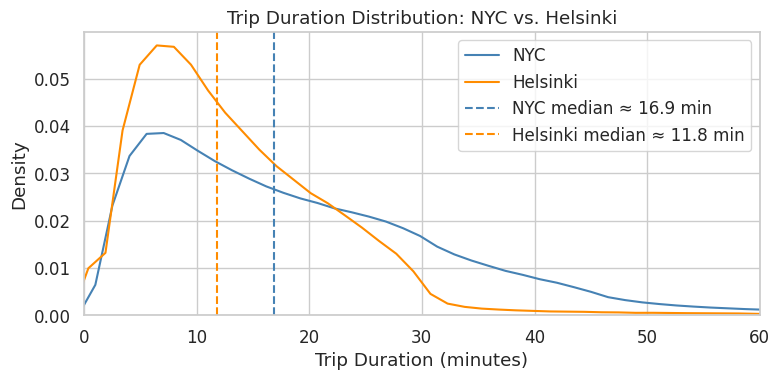

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# convert to minutes
nyc_minutes = df_nyc['duration_s'] / 60
hel_minutes = df_helsinki['duration (sec.)'] / 60

plt.figure(figsize=(8, 4))
sns.kdeplot(nyc_minutes, bw_adjust=0.5, label='NYC', color='steelblue')
sns.kdeplot(hel_minutes, bw_adjust=0.5, label='Helsinki', color='darkorange')
plt.axvline(nyc_minutes.median(), color='steelblue', linestyle='--',
            label=f"NYC median ≈ {nyc_minutes.median():.1f} min")
plt.axvline(hel_minutes.median(), color='darkorange', linestyle='--',
            label=f"Helsinki median ≈ {hel_minutes.median():.1f} min")
plt.xlim(0, 60)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Density")
plt.title("Trip Duration Distribution: NYC vs. Helsinki")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Research Questions
# How do trip duration distributions compare between NYC and Helsinki, and what factors might explain the differences?
# How do trip distances and average speeds vary between the two cities, and what insights do these differences offer about urban infrastructure and rider behaviour? (done)
# How does bike-sharing usage differ by time-of-day and day-of-week in NYC versus Helsinki? (done)
# Which stations exhibit the highest usage in each city, and how do their spatial distributions to urban features influence this usage? (done)
# What do the distributions of trip lengths—both in time and distance—reveal about system efficiency and user behavior?

# isn't first and fith ques kinda look same?



# How do trip distances and average speeds vary between the two cities, and what insights do these differences offer about urban infrastructure and rider behaviour? (done)


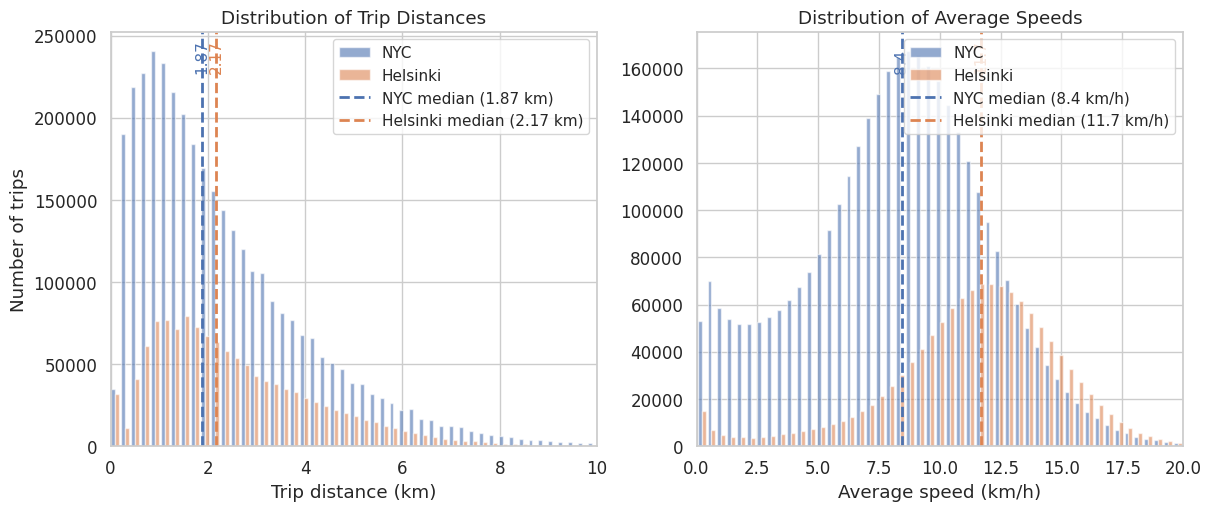

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute medians
nyc_dist  = df_nyc['distance_km']
hel_dist  = df_helsinki['distance (m)'] / 1000
nyc_speed = df_nyc['speed_kmh']
hel_speed = df_helsinki['speed_kmh']

medians = {
    'NYC':      {'dist': nyc_dist.median(),  'spd': nyc_speed.median()},
    'Helsinki': {'dist': hel_dist.median(),  'spd': hel_speed.median()}
}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# ─── Trip Distances ────────────────────────────────────────────────────────────
axes[0].hist(
    [nyc_dist, hel_dist],
    bins=np.linspace(0, 10, 50),
    label=['NYC','Helsinki'],
    alpha=0.6
)
for city, color in [('NYC','C0'), ('Helsinki','C1')]:
    m = medians[city]['dist']
    axes[0].axvline(
        m, color=color, linestyle='--', lw=2,
        label=f"{city} median ({m:.2f} km)"
    )
    # small vertical text label above the line
    axes[0].text(
        m, axes[0].get_ylim()[1]*0.9,
        f"{m:.2f}", color=color,
        ha='center', va='bottom', fontsize='small', rotation=90
    )
axes[0].set_xlim(0, 10)
axes[0].set_xlabel("Trip distance (km)")
axes[0].set_ylabel("Number of trips")
axes[0].set_title("Distribution of Trip Distances")
axes[0].legend(fontsize='small')

# ─── Average Speeds ────────────────────────────────────────────────────────────
axes[1].hist(
    [nyc_speed, hel_speed],
    bins=np.linspace(0, 20, 50),
    label=['NYC','Helsinki'],
    alpha=0.6
)
for city, color in [('NYC','C0'), ('Helsinki','C1')]:
    m = medians[city]['spd']
    axes[1].axvline(
        m, color=color, linestyle='--', lw=2,
        label=f"{city} median ({m:.1f} km/h)"
    )
    axes[1].text(
        m, axes[1].get_ylim()[1]*0.9,
        f"{m:.1f}", color=color,
        ha='center', va='bottom', fontsize='small', rotation=90
    )
axes[1].set_xlim(0, 20)
axes[1].set_xlabel("Average speed (km/h)")
axes[1].set_title("Distribution of Average Speeds")
axes[1].legend(fontsize='small')

plt.show()


What this tells us
Trip lengths:

NYC riders tend to take very short hops—perhaps using Citi Bike as “last-mile” connectors between subway stations.

Helsinki riders are more willing (or able) to go longer distances, suggesting a more bike-friendly network and potentially cheaper per-minute pricing.

Average speeds:

The lower speeds in NYC are driven by frequent traffic lights, heavy bike & pedestrian congestion, and a largely classic pedal-only fleet.

The higher speeds in Helsinki reflect flatter terrain, dedicated bike lanes, and a large share of e-bikes that boost average velocity.


Implications for Efficiency & Behaviour

System Efficiency: Higher median speeds in Helsinki imply faster turnover of bikes—good for utilization.

User Behaviour: Short, slow trips in NYC may reflect heavy stop-and-go traffic, high station density (short hops), or first-/last-mile usage.

Network Design: Helsinki’s sparser but faster network suggests opportunities in NYC for more dedicated lanes to boost speed.



In [ ]:
%pip install openmeteo_requests requests_cache retry_requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.3 MB/s eta 0:00:00


# How sensitive is bike-share demand to daily temperature in each city?

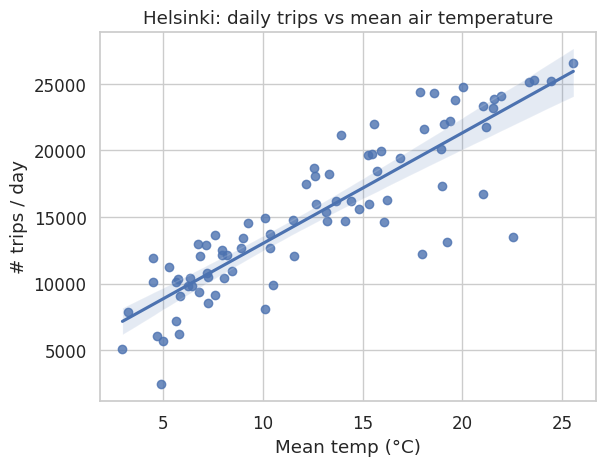

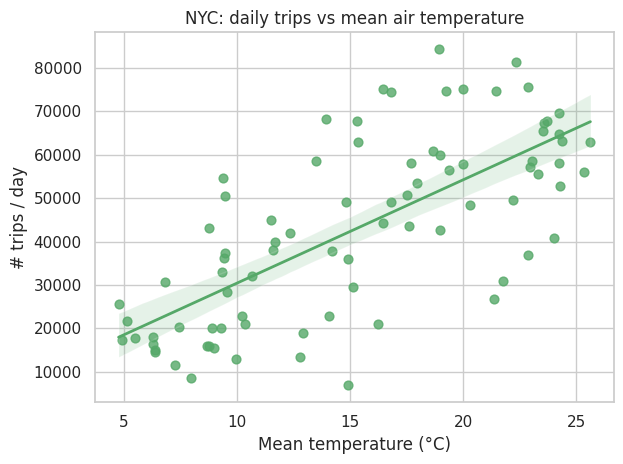

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests_cache
from retry_requests import retry
import openmeteo_requests


# ------------------------  HELSINKI  ------------------------
# 1) day stamp
df_helsinki['date'] = df_helsinki['departure'].dt.date          # <- make a pure-date column

# 2) daily aggregation
hel_daily = (
    df_helsinki
      .groupby('date')
      .agg(trips = ('departure_id', 'size'),        # just count any column → # trips
           temp  = ('Air temperature (degC)', 'mean'))
      .reset_index()
)

# 3) plot
sns.regplot(data=hel_daily, x='temp', y='trips')
plt.title("Helsinki: daily trips vs mean air temperature")
plt.xlabel("Mean temp (°C)"); plt.ylabel("# trips / day")
plt.show()


# ------------------------  NYC  ------------------------
import pandas as pd, requests, seaborn as sns, matplotlib.pyplot as plt

# ── parameters ───────────────────────────────────────────────


# -----------------------------------------------------------------
# 1.  BASIC PARAMETERS  ────────────────────────────────────────────
CITY      = "NYC"                     # label used later in the plot title
LAT, LON  = 40.71, -74.01             # coords (NYC)
TZ        = "America/New_York"        # always set a local timezone for DAILY data
START, END = "2020-04-08", "2020-06-29"
# -----------------------------------------------------------------

# 2.  CLIENT WITH CACHING + RETRY  ─────────────────────────────────
cache = requests_cache.CachedSession(".cache", expire_after=-1)
session = retry(cache, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=session)

# 3.  BUILD REQUEST  ──────────────────────────────────────────────
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    "latitude": LAT,
    "longitude": LON,
    "start_date": START,
    "end_date": END,
    "timezone": TZ,                            # <── important!
    "daily": ["temperature_2m_mean",
              "temperature_2m_max",
              "temperature_2m_min"]
}
response = openmeteo.weather_api(url, params=params)[0]          # one location

# 4.  CONVERT -> tidy DataFrame  ──────────────────────────────────
daily = response.Daily()
rng   = pd.date_range(
          start=pd.to_datetime(daily.Time(),    unit="s", utc=True).tz_convert(TZ),
          end  =pd.to_datetime(daily.TimeEnd(), unit="s", utc=True).tz_convert(TZ),
          freq = pd.Timedelta(seconds=daily.Interval()),
          inclusive="left"
       )
weather = pd.DataFrame({
    "date" : rng.date,
    "tmean": daily.Variables(0).ValuesAsNumpy(),
    "tmax" : daily.Variables(1).ValuesAsNumpy(),
    "tmin" : daily.Variables(2).ValuesAsNumpy()
})

# 5.  AGGREGATE BIKE TRIPS BY DATE  ───────────────────────────────
nyc_daily = (
    df_nyc
    .groupby(df_nyc["started_at"].dt.date, as_index=False)
    .size()
    .rename(columns={"started_at": "date", "size": "trips"})
)

# 6.  MERGE  &  QUICK REGRESSION PLOT  ────────────────────────────
daily_df = nyc_daily.merge(weather, on="date", how="left", validate="1:1")
sns.set_theme(style="whitegrid")
ax = sns.regplot(data=daily_df, x="tmean", y="trips", color="C2",
                 scatter_kws={"s":40, "alpha":0.8}, line_kws={"lw":2})
ax.set(title=f"{CITY}: daily trips vs mean air temperature",
       xlabel="Mean temperature (°C)", ylabel="# trips / day")
plt.tight_layout();  plt.show()

Both cities: warmer days correlate with higher ridership → favorable weather is a universal demand driver.

Helsinki: demand is temperature-dominated; linear model fits tightly (narrow band).

NYC: demand is temperature-sensitive but multi-factor; greater residual variance signals the influence of social and urban complexity.


Steeper slope in Helsinki – trips jump sharply above ~10 °C, flat below.

NYC shows higher absolute trips but more scatter - Demand in NYC is influenced by many factors in addition to temperature (tourism spikes, weekend events, etc.).

Temperature is a reliable demand predictor in both cities, but NYC needs extra features (rain, weekend/holiday dummy, special-event flag) to reach the same explanatory power that temperature alone provides in Helsinki.










**for your understanding**

Dots (circles)	One dot = one calendar day in the April – June 2020 window.
Diagonal solid line	A simple-linear-regression fit through all dots.
Shaded band	95 % confidence band around the regression line.

In [ ]:
df_nyc

ride_id  rideable_type              started_at  \
0        19C6EDF5A2396D61   classic_bike 2020-04-22 20:54:06.711   
1        2550DE88E4F3410C   classic_bike 2020-04-08 10:52:20.635   
3        ED9238665EE31546   classic_bike 2020-04-12 16:11:28.706   
4        0A0F2B07945E969F   classic_bike 2020-04-22 17:43:19.280   
5        9A3A386568B4B24E  electric_bike 2020-04-14 19:50:52.060   
...                   ...            ...                     ...   
5135807  FBC651AC9654DB27   classic_bike 2020-06-10 18:27:00.334   
5135808  85D7E38AAAC990F5   classic_bike 2020-06-28 16:17:04.412   
5135809  50A20DCB7B63389B   classic_bike 2020-06-15 22:15:24.862   
5135810  E27B69521C74A971   classic_bike 2020-06-23 00:09:40.264   
5135811  776818943F49220A  electric_bike 2020-06-23 18:40:03.030   

                       ended_at        start_station_name start_station_id  \
0       2020-04-22 21:27:35.004        Front St & Gold St          4927.04   
1       2020-04-08 11:22:02.079   Riverside Dr & W 104 St          7623.13   
3       2020-04-12 16:35:47.159   Riverside Dr & W 104 St          7623.13   
4       2020-04-22 17:59:21.319       Broadway & Berry St          5164.04   
5       2020-04-14 20:18:59.214           E 45 St & 3 Ave          6464.08   
...                         ...                       ...              ...   
5135807 2020-06-10 18:57:15.693           E 55 St & 2 Ave          6650.07   
5135808 2020-06-28 16:18:31.725          11 Ave & W 27 St          6425.04   
5135809 2020-06-15 22:27:50.270  E 106 St & Lexington Ave          7504.18   
5135810 2020-06-23 00:21:54.753  E 106 St & Lexington Ave          7504.18   
5135811 2020-06-23 19:24:07.648          11 Ave & W 27 St          6425.04   

                    end_station_name end_station_id  start_lat  start_lng  \
0                  Front St & Jay St        4895.03  40.702240 -73.982578   
1                    E 74 St & 1 Ave        6953.08  40.801343 -73.971146   
3                    W 54 St & 9 Ave        6920.03  40.801343 -73.971146   
4            Franklin St & Dupont St        5944.01  40.710446 -73.965251   
5                Mott St & Prince St        5561.04  40.752554 -73.972826   
...                              ...            ...        ...        ...   
5135807  E 58 St & 1 Ave (NW Corner)         6723.1  40.757973 -73.966033   
5135808             W 26 St & 10 Ave        6382.05  40.751396 -74.005226   
5135809           W 95 St & Broadway        7541.01  40.791976 -73.945993   
5135810           W 95 St & Broadway        7541.01  40.791976 -73.945993   
5135811      Greene Ave & Throop Ave        4510.04  40.751396 -74.005226   

           end_lat    end_lng member_casual  duration_s  distance_km  \
0        40.702461 -73.986842        member    2008.293     0.360285   
1        40.768974 -73.954823        member    1781.444     3.852716   
3        40.765849 -73.986905        casual    1458.453     4.163817   
4        40.735640 -73.958660        member     962.039     2.855980   
5        40.723180 -73.994800        member    1687.154     3.754455   
...            ...        ...           ...         ...          ...   
5135807  40.759125 -73.962658        member    1815.359     0.311794   
5135808  40.749718 -74.002950        member      87.313     0.267529   
5135809  40.793770 -73.971888        member     745.408     2.189031   
5135810  40.793770 -73.971888        member     734.489     2.189031   
5135811  40.689493 -73.942061        member    2644.618     8.701532   

         speed_kmh  hour    weekday  
0         0.645835    20  Wednesday  
1         7.785694    10  Wednesday  
3        10.277836    16     Sunday  
4        10.687227    17  Wednesday  
5         8.011146    19    Tuesday  
...            ...   ...        ...  
5135807   0.618312    18  Wednesday  
5135808  11.030482    16     Sunday  
5135809  10.572080    22     Monday  
5135810  10.729245     0    Tuesday  
5135811  11.845006    18    Tuesday  

[3559129 rows x 1

In [ ]:
df_helsinki

departure              return departure_id   departure_name  \
91558   2020-04-08 00:01:03 2020-04-08 00:14:46           87      Kustaankatu   
91559   2020-04-08 00:02:42 2020-04-08 00:16:35           36      Apollonkatu   
91560   2020-04-08 00:02:57 2020-04-08 00:15:38           75         Korjaamo   
91561   2020-04-08 00:03:09 2020-04-08 00:21:21           36      Apollonkatu   
91562   2020-04-08 00:03:28 2020-04-08 00:32:06          133   Paavalinpuisto   
...                     ...                 ...          ...              ...   
1385094 2020-06-29 23:59:17 2020-06-30 00:11:14           76   Olympiastadion   
1385095 2020-06-29 23:59:29 2020-06-30 00:29:21          104     Kriikunakuja   
1385096 2020-06-29 23:59:40 2020-06-30 00:23:44          122  Lintulahdenkatu   
1385097 2020-06-29 23:59:48 2020-06-30 00:30:32          104     Kriikunakuja   
1385098 2020-06-29 23:59:58 2020-06-30 00:23:06          761   Mäkkylän asema   

        return_id         return_name  distance (m)  duration (sec.)  \
91558        87.0         Kustaankatu        1527.0            819.0   
91559        29.0               Baana        2555.0            831.0   
91560        63.0  Jätkäsaarenlaituri        2476.0            755.0   
91561         3.0  Kapteeninpuistikko        2948.0           1087.0   
91562       117.0    Brahen puistikko        1178.0           1715.0   
...           ...                 ...           ...              ...   
1385094     161.0      Eteläesplanadi        2472.0            712.0   
1385095     104.0        Kriikunakuja        3214.0           1788.0   
1385096      80.0            Jäähalli        4502.0           1440.0   
1385097     104.0        Kriikunakuja        1850.0           1840.0   
1385098     711.0        Kirjurinkuja        3939.0           1375.0   

         avg_speed (km/h)  departure_latitude  departure_longitude  \
91558            0.111868           60.188275            24.955976   
91559            0.184477           60.176080            24.922394   
91560            0.196768           60.183868            24.919837   
91561            0.162723           60.176080            24.922394   
91562            0.041213           60.197489            24.961438   
...                   ...                 ...                  ...   
1385094          0.208315           60.184506            24.924974   
1385095          0.107852           60.205678            24.891682   
1385096          0.187583           60.183718            24.962194   
1385097          0.060326           60.205678            24.891682   
1385098          0.171884           60.220467            24.839390   

         return_latitude  return_longitude  Air temperature (degC)  speed_kmh  \
91558          60.188275         24.955976                     6.2   6.712088   
91559          60.164088         24.922566                     6.2  11.068592   
91560          60.161931         24.921490                     6.2  11.806093   
91561          60.158189         24.944927                     6.2   9.763385   
91562          60.189671         24.948102                     6.2   2.472770   
...                  ...               ...                     ...        ...   
1385094        60.167231         24.947466                    17.5  12.498876   
1385095        60.205678         24.891682                    17.5   6.471141   
1385096        60.189402         24.920598                    17.5  11.255000   
1385097        60.205678         24.891682                    17.5   3.619565   
1385098        60.216695         24.826435                    17.5  10.313018   

         hour    weekday        date  
91558       0  Wednesday  2020-04-08  
91559       0  Wednesday  2020-04-08  
91560       0  Wednesday  2020-04-08  
91561       0  Wednesday  2020-04-08  
91562       0  Wednesday  2020-04-08  
...       ...        ...         ...  
1385094    23     Monday  2020-06-29  
1385095    23     Monday  2020-06-29  
1385096    23  

In [ ]:
%pip install osmnx pyproj

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 3.1 MB/s eta 0:00:00


In [ ]:

crs_wgs = pyproj.CRS.from_epsg(4326)   # input lat/lon
crs_web = pyproj.CRS.from_epsg(3857)   # for plotting

# How does a station’s bike‐share usage relate to how close it is to subway entrances, residential neighborhoods, and parks in NYC (and how does that compare to Helsinki)?

In [ ]:
import osmnx as ox
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pyproj
import pandas as pd

# --- 1) Get the bike network + POIs exactly as before ---
place_name = "Helsinki, Finland"
crs_wgs = pyproj.CRS.from_epsg(4326)   # input lat/lon
crs_web = pyproj.CRS.from_epsg(3857)   # for plotting

# buffer city so edges cover a bit outside center
city = ox.geocode_to_gdf(place_name).to_crs(crs_web)
buffer = city.buffer(1000)   # 1000 meters
poly   = buffer.to_crs(crs_wgs).iloc[0]

# graph → GeoDataFrames
G     = ox.graph_from_polygon(poly, network_type="bike", simplify=True)
nodes, edges = ox.graph_to_gdfs(G)

# pull OSM POIs
residential = ox.features_from_polygon(poly, {"landuse": "residential"})
parks       = ox.features_from_polygon(poly, {"leisure": "park"})
study_locs  = ox.features_from_polygon(poly, {"amenity": ["school","university"]})

# reproject everything to web-merc:
edges       = edges.to_crs(crs_web)
residential = residential.to_crs(crs_web)
parks       = parks.to_crs(crs_web)
study_locs  = study_locs.to_crs(crs_web)

In [ ]:


# --- 2) Build your station‐usage GeoDataFrame from your CSV trips ---

# count how many trips start at each station:
counts = df_helsinki['departure_name'].value_counts().rename_axis('station').reset_index(name='trips')

# get one coordinate per station
coords = (
    df_helsinki.drop_duplicates('departure_name')
               .set_index('departure_name')
               [['departure_longitude','departure_latitude']]
               .rename(columns={'departure_longitude':'lon','departure_latitude':'lat'})
)

In [ ]:

# merge counts + coords
stations = counts.merge(coords, left_on='station', right_index=True)

# make GeoDataFrame
gdf_stations = gpd.GeoDataFrame(
    stations,
    geometry=gpd.points_from_xy(stations.lon, stations.lat),
    crs=crs_wgs
).to_crs(crs_web)

# size circles by sqrt(trips) for better scaling
gdf_stations['size'] = (gdf_stations.trips**0.5) * 2



In [1]:
# --- 3) Plot everything together ---
fig, ax = plt.subplots(figsize=(12, 12))

# ● the network
edges.plot(ax=ax, linewidth=0.4, color='gray')

# ● the POI layers
residential.plot(ax=ax, color='lightblue', alpha=0.5, label='Residential')
parks.plot(ax=ax,       color='green',     alpha=0.5, label='Parks')
study_locs.plot(ax=ax,  color='red',       markersize=15, label='Schools/Unis')

# ● **your** station usage
gdf_stations.plot(
    ax=ax,
    markersize='size',
    color='orange',
    alpha=0.7,
    edgecolor='k',
    linewidth=0.5,
    label='Helsinki trip starts'
)

# basemap + tight extent
ctx.add_basemap(ax, crs=crs_web, source=ctx.providers.CartoDB.Positron)
# minx, miny, maxx, maxy = edges.total_bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)

minx, miny, maxx, maxy = edges.total_bounds
ax.set_xlim(minx - 500, maxx + 500)
ax.set_ylim(miny - 500, maxy + 500)
ax.set_title("Top 10 NYC Stations")
ax.axis('off')

ax.set_title("Helsinki Bike Network + POIs + Station Usage", fontsize=16)
ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [2]:
import folium
from folium import features
import json

# 1) Center point for the map (use the mean of all station coords)
center_lat = gdf_stations.to_crs(epsg=4326).geometry.y.mean()
center_lon = gdf_stations.to_crs(epsg=4326).geometry.x.mean()

# 2) Create the base Folium map
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=13,           # adjust to taste
    tiles="CartoDB.Positron" # clean background
)

# 3) Add the street network (linestrings)
#    Convert to GeoJSON, then add as a GeoJson layer
folium.GeoJson(
    edges.to_crs(epsg=4326).__geo_interface__,
    name="Bike network",
    style_function=lambda feat: {
        "color": "gray",
        "weight": 1,
        "opacity": 0.6
    }
).add_to(m)

# 4) Add POI layers with different styles
for gdf, color, name in [
    (residential.to_crs(epsg=4326), "#c6dbef", "Residential"),
    (parks      .to_crs(epsg=4326), "#a1d99b", "Parks"),
    (study_locs .to_crs(epsg=4326), "#de2d26", "Schools/Unis")
]:
    folium.GeoJson(
        gdf.__geo_interface__,
        name=name,
        style_function=lambda feat, col=color: {
            "fillColor": col,
            "color": col,
            "weight": 0,
            "fillOpacity": 0.4
        }
    ).add_to(m)

# 5) Add your station‐usage circles
for _, row in gdf_stations.to_crs(epsg=4326).iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius = max(3, row.size),    # ensure minimum visibility
        color  = "orange",
        fill   = True,
        fill_opacity=0.7,
        popup = f"{row.station}: {row.trips} trips"
    ).add_to(m)

# 6) Add layer control so you can toggle layers on/off
folium.LayerControl().add_to(m)

# 7) Display the map
m

ModuleNotFoundError: No module named 'folium'

In [ ]:
m.save("bike_network_helsinki.html")

Gray lines are the bike-amenable streets OSMnx pulled for all of Helsinki.

Light-blue patches are residential neighborhoods.

Green patches are parks.

blue markers are schools & universities.

Orange circles are your actual stations, sized proportional to how many trips started there.

Because the vast majority of stations (and indeed the city’s population) is concentrated in the center, almost every big orange circle ends up sitting on a light-blue or gray background. That makes it look like “demand only happens in one place,” but really you’re just seeing where stations exist—and you’ve never deployed a station in the far-flung suburbs or islands, so of course there’s no demand there.

Key insights
Demand concentrates in mixed-use zones (where homes, schools, and shops intermix): that red-dot university area is ringed by large orange bubbles, which means students and staff are heavy riders.

Parks seem to generate trips—notice green areas (like perhaps Töölönlahti park or Kaivopuisto) have orange circles around their edges, indicating people ride in/out for recreation.

Network alignment matters—almost all the biggest circles sit directly on the densest gray network, not on narrow streets. Good bike infrastructure correlates with high usage.



In [ ]:
import osmnx as ox
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pyproj
import pandas as pd

place_name_ = "New York City, USA"

# buffer city so edges cover a bit outside center
city_ = ox.geocode_to_gdf(place_name_).to_crs(crs_web)
buffer_ = city_.buffer(1000)   # 1000 meters
poly_   = buffer_.to_crs(crs_wgs).iloc[0]

# graph → GeoDataFrames
G_     = ox.graph_from_polygon(poly_, network_type="bike", simplify=True)
nodes_, edges_ = ox.graph_to_gdfs(G_)

# pull OSM POIs
residential_ = ox.features_from_polygon(poly_, {"landuse": "residential"})
parks_       = ox.features_from_polygon(poly_, {"leisure": "park"})
study_locs_  = ox.features_from_polygon(poly_, {"amenity": ["school","university"]})

# reproject everything to web-merc:
edges_       = edges_.to_crs(crs_web)
residential_ = residential_.to_crs(crs_web)
parks_       = parks_.to_crs(crs_web)
study_locs_  = study_locs_.to_crs(crs_web)

In [ ]:

# --- 2) Build your station‐usage GeoDataFrame from your CSV trips ---

# count how many trips start at each station:
counts_ = df_nyc['start_station_name'].value_counts().rename_axis('station').reset_index(name='trips')

# get one coordinate per station
coords_ = (
    df_nyc.drop_duplicates('start_station_name')
               .set_index('start_station_name')
               [['start_lat','start_lng']]
               .rename(columns={'start_lat':'lat','start_lng':'lon'})
)

In [ ]:

# merge counts + coords
stations_ = counts_.merge(coords_, left_on='station', right_index=True)

# make GeoDataFrame
gdf_stations_ = gpd.GeoDataFrame(
    stations_,
    geometry=gpd.points_from_xy(stations_.lon, stations_.lat),
    crs=crs_wgs
).to_crs(crs_web)

# size circles by sqrt(trips) for better scaling
gdf_stations_['size'] = (gdf_stations_.trips**0.5) * 2



<ipython-input-47-831d0b2f4373>:37: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax_.legend()


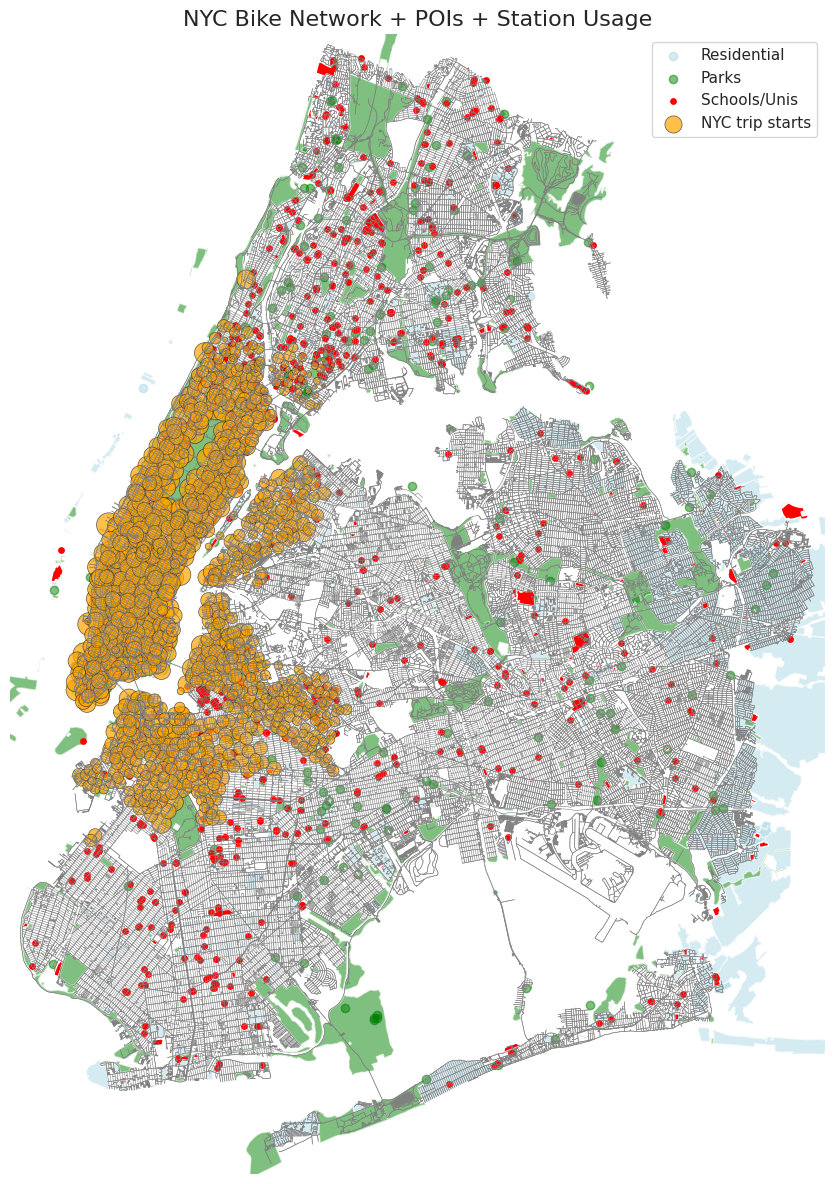

In [ ]:
# --- 3) Plot everything together ---
fig_, ax_ = plt.subplots(figsize=(12, 12))

# ● the network
edges_.plot(ax=ax_, linewidth=0.4, color='gray')

# ● the POI layers
residential_.plot(ax=ax_, color='lightblue', alpha=0.5, label='Residential')
parks_.plot(ax=ax_,       color='green',     alpha=0.5, label='Parks')
study_locs_.plot(ax=ax_,  color='red',       markersize=15, label='Schools/Unis')

# ● **your** station usage
gdf_stations_.plot(
    ax=ax_,
    markersize='size',
    color='orange',
    alpha=0.7,
    edgecolor='k',
    linewidth=0.5,
    label='NYC trip starts'
)

# basemap + tight extent
ctx.add_basemap(ax, crs=crs_web, source=ctx.providers.CartoDB.Positron)
# minx, miny, maxx, maxy = edges.total_bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)

minx, miny, maxx, maxy = edges_.total_bounds
ax_.set_xlim(minx - 500, maxx + 500)
ax_.set_ylim(miny - 500, maxy + 500)
ax_.set_title("Top 10 NYC Stations")
ax_.axis('off')

ax_.set_title("NYC Bike Network + POIs + Station Usage", fontsize=16)
ax_.axis('off')
ax_.legend()
plt.tight_layout()
plt.show()


In [ ]:
%pip install folium

In [ ]:
import folium
from folium import features
import json

# 1) Center point for the map (use the mean of all station coords)
center_lat_ = gdf_stations_ .to_crs(epsg=4326).geometry.y.mean()
center_lon_ = gdf_stations_ .to_crs(epsg=4326).geometry.x.mean()

# 2) Create the base Folium map
m_ = folium.Map(
    location=[center_lat_, center_lon_],
    zoom_start=13,           # adjust to taste
    tiles="CartoDB.Positron" # clean background
)

# 3) Add the street network (linestrings)
#    Convert to GeoJSON, then add as a GeoJson layer
folium.GeoJson(
    edges_.to_crs(epsg=4326).__geo_interface__,
    name="Bike network",
    style_function=lambda feat: {
        "color": "gray",
        "weight": 1,
        "opacity": 0.6
    }
).add_to(m_)

# 4) Add only the polygonal layers in the main loop:
for gdf, color, name in [
    (residential_.to_crs(epsg=4326), "#c6dbef", "Residential"),
    (parks_      .to_crs(epsg=4326), "#a1d99b", "Parks"),
]:
    folium.GeoJson(
        gdf.__geo_interface__,
        name=name,
        style_function=lambda feat, col=color: {
            "fillColor":   col,
            "color":       col,
            "weight":      0,
            "fillOpacity": 0.4
        }
    ).add_to(m_)

# 5) Now add only the polygonal bits of schools/unis:
poly_schools = study_locs_[study_locs_.geom_type.isin(['Polygon','MultiPolygon'])]
folium.GeoJson(
    poly_schools.to_crs(epsg=4326).__geo_interface__,
    name="Schools/Unis",
    style_function=lambda feat: {
        "fillColor":   "#de2d26",
        "color":       "#de2d26",
        "weight":      0,
        "fillOpacity": 0.4
    }
).add_to(m_)


# 6) Add layer control so you can toggle layers on/off
folium.LayerControl().add_to(m_)

# 7) Display the map
m_

In [ ]:
m_.save("bike_network_nyc.html")

You can see that the busiest stations (the largest orange circles) cluster in Manhattan’s core, especially around major subway hubs and dense residential neighborhoods. Peripheral neighborhoods and parks get far fewer starts simply because Citi Bike stations are almost exclusively deployed in the central business/residential district.